### Feature Engineering

- 2 - Feature Engineering the dataset.
  - read feather file.
  - create the feature - target.
  - Save feather format.

In [29]:
import feather
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lux

In [30]:
# Get start time 
start_time = time.time()

In [31]:
# loading data feather format
df_covid_cleaned = pd.read_feather('../dataset/feather/cleaned.ftr')
df_covid_cleaned

/home/andsilva/.local/lib/python3.10/site-packages/lux/executor/PandasExecutor.py:548: UserWarning:Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [32]:
df_covid_cleaned.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object


In [33]:
df_covid_cleaned.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [34]:
# creating a new cloumn based on the column 'DATE_DIED'
# DATE is e.g. 15/02/2020 - True(Died), otherwise is False(Alive).
df_covid_cleaned['ALIVE_OR_DIED'] = np.where(df_covid_cleaned['DATE_DIED']!= '9999-99-99', 'Died', 'Alive')
df_covid_cleaned['ALIVE_OR_DIED']

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [35]:
df_covid_cleaned.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU',
       'ALIVE_OR_DIED'],
      dtype='object')

In [36]:
df_covid_cleaned = df_covid_cleaned.drop(columns='DATE_DIED') # drop column - DATE_DIED
df_covid_cleaned['ALIVE_OR_DIED']

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [37]:
# change type for column of object to category
df_covid_cleaned['ALIVE_OR_DIED'] = df_covid_cleaned['ALIVE_OR_DIED'].astype('category')
df_covid_cleaned['ALIVE_OR_DIED']

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [38]:
df_covid_cleaned.describe().transpose()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

([<matplotlib.patches.Wedge at 0x7f707049f940>,
 [Text(-1.070884192216227, 0.25141011686365927, 'Alive'),
  Text(1.0708842216396122, -0.25140999153439036, 'Died')],
 [Text(-0.5841186502997602, 0.13713279101654138, '92.66%'),
  Text(0.5841186663488792, -0.137132722655122, '7.34%')])

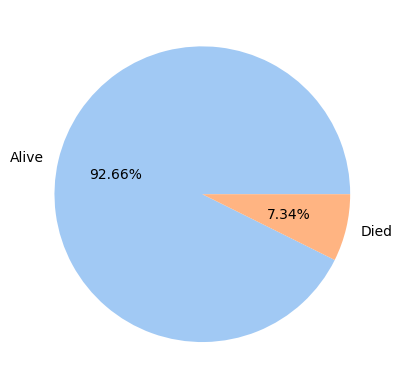

In [39]:
alive_died = df_covid_cleaned['ALIVE_OR_DIED'].value_counts(normalize=True).map('{:.2%}'.format).to_dict()

alive_died_stat = dict()
for key in alive_died:
    value = alive_died[key]
    numstat = value[:len(value)-1]
    alive_died_stat[key] = float(numstat)
    
keys = alive_died_stat.keys()
values = alive_died_stat.values()

# define Seaborn color palette to use
palette_color = sns.color_palette("pastel")

# plotting data on chart
plt.pie(values, labels=keys, colors=palette_color, autopct='%.2f%%')

In [40]:
# Alternatively X and y can be obtained directly from the dataframe attribute:
X = df_covid_cleaned.drop('ALIVE_OR_DIED', axis=1) # drop the column target
y = df_covid_cleaned['ALIVE_OR_DIED'] # target()



In [45]:
from sklearn.cluster import KMeans

Kmean = KMeans(n_clusters=4)
Kmean.fit(X)

/home/andsilva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KMeans(n_clusters=4)

In [46]:
Kmean.labels_

array([0, 1, 3, ..., 1, 1, 1], dtype=int32)

In [47]:
df_covid_cleaned.nunique()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [48]:
print(f"Shape dataset Full after clean:.........observations/rows: {df_covid_cleaned.shape[0]} and columns: {df_covid_cleaned.shape[1]}")

Shape dataset Full after clean:.........observations/rows: 1048575 and columns: 21


In [49]:
print("saving the file format feather...")
# this is important to do before save in feather format.
df_covid_cleaned = df_covid_cleaned.reset_index(drop=True) 
df_covid_cleaned.to_feather('../dataset/feather/featureselection.ftr')

saving the file format feather...
